# Communication channel

This example demonstrates how to create
a connection from one neuronal ensemble to another
that behaves like a communication channel
(that is, it transmits information without changing it).

Network diagram:

      [Input] ---> (A) ---> (B)

An abstract input signal is fed into
the first neuronal ensemble $A$,
which then passes it on to another ensemble $B$.
The result is that spiking activity in ensemble $B$
encodes the value from the Input.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo

## Step 1: Create the Network

In [2]:
# Create a 'model' object to which we can add ensembles, connections, etc.
model = nengo.Network(label="Communications Channel")
with model:
    # Create an abstract input signal that oscillates as sin(t)
    sin = nengo.Node(np.sin)

    # Create the neuronal ensembles
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)

    # Connect the input to the first neuronal ensemble
    nengo.Connection(sin, A)

    # Connect the first neuronal ensemble to the second
    # (this is the communication channel)
    nengo.Connection(A, B)

## Step 2: Add Probes to Collect Data

Even this simple model involves many quantities
that change over time, such as membrane potentials of individual neurons.
Typically there are so many variables in a simulation
that it is not practical to store them all.
If we want to plot or analyze data from the simulation
we have to "probe" the signals of interest.

In [3]:
with model:
    sin_probe = nengo.Probe(sin)
    A_probe = nengo.Probe(A, synapse=.01)  # ensemble output
    B_probe = nengo.Probe(B, synapse=.01)

## Step 3: Run the Model!

In [4]:
with nengo.Simulator(model) as sim:
    sim.run(2)

## Step 4: Plot the Results

(0.0, 1.2)

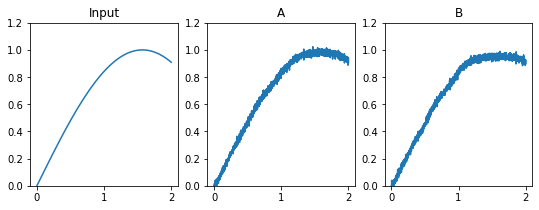

In [5]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.title("Input")
plt.plot(sim.trange(), sim.data[sin_probe])
plt.ylim(0, 1.2)
plt.subplot(1, 3, 2)
plt.title("A")
plt.plot(sim.trange(), sim.data[A_probe])
plt.ylim(0, 1.2)
plt.subplot(1, 3, 3)
plt.title("B")
plt.plot(sim.trange(), sim.data[B_probe])
plt.ylim(0, 1.2)

These plots show the idealized sinusoidal input,
and estimates of the sinusoid that are decoded
from the spiking activity of neurons in ensembles A and B.

## Step 5: Using a Different Input Function

To drive the neural ensembles with different abstract inputs,
it is convenient to use Python's "Lambda Functions".
For example, try changing the `sin = nengo.Node` line
to the following for higher-frequency input:

    sin = nengo.Node(lambda t: np.sin(2*np.pi*t))